In [1]:
import numpy
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()

In [3]:
# We see that we have 1797 images, each 8x8=64 pixels
print("Image data shape", digits.data.shape)

# And we see we have the right number of labels (integers from 0-9)
print("Label data shape", digits.target.shape)

Image data shape (1797, 64)
Label data shape (1797,)


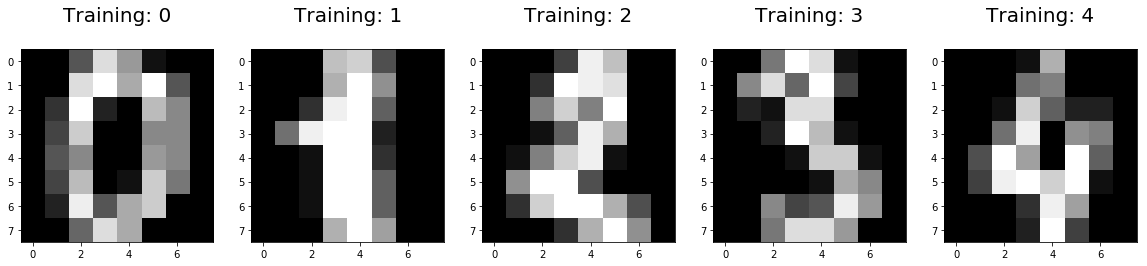

In [4]:
# Show a few training images
plt.figure(figsize=(20,4))
for index, (image,label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(numpy.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize=20)

In [5]:
type(digits)
binary_digits = load_digits()
type(binary_digits)

sklearn.utils.Bunch

In [6]:
binary_digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

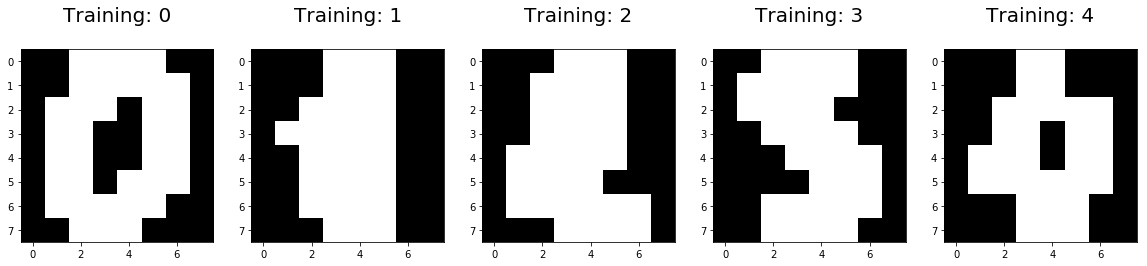

In [7]:
# Now, let's threshold the data
threshold = 12
#binary_digits = numpy.copy(digits)
binary_digits.data[digits.data < threshold] = 0.0
binary_digits.data[digits.data > 0.0] = 1.0

# Show the same training images after thresholding
plt.figure(figsize=(20,4))
for index, (image,label) in enumerate(zip(binary_digits.data[0:5], binary_digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(numpy.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize=20)


In [8]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(binary_digits.data, binary_digits.target, test_size=0.25, random_state=0)

In [9]:
# import scikit learn logistic regression ML model
from sklearn.linear_model import LogisticRegression

In [10]:
# Create a model instance
LRmodel = LogisticRegression()

# train model and store information learned
# x is digit images and y is labels
LRmodel.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [11]:
# predict labels for first test image
LRmodel.predict(x_test[0].reshape(1,-1))

array([2])

In [12]:
# get all test predictions
predictions = LRmodel.predict(x_test)

In [13]:
# compute accuracy
score = LRmodel.score(x_test, y_test)
print(score)

0.9022222222222223
